In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

Uploading the dataset

In [9]:
data = pd.read_csv("StudentsPerformance.csv")

In [10]:
data


gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

**1. Understanding the data**


In [11]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [13]:
data.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [14]:
data.shape

(1000, 8)

In [15]:
data.describe()
# only for integer values

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [16]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [17]:
# check for unique values
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [18]:
# check for specific column
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [19]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [20]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

**2. Cleaning the data**




In [21]:
# checking null values in data
data.isnull()

gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                      False       False          False          False  
2                      False       False          False          False  
3                      False       False          False          False  
4                      False       False          False          False  
..                       ...         ...            ...            ...  
995                    False       False          False          False  
996                    False       False          False          False  
997                    False       False          False          False  
998                    False       False          False          False  
999                    False       False          False          False  

[1000 rows x 8 columns]

In [23]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
#dropping the redundant data
student = data.drop(['race/ethnicity', 'parental level of education'], axis = 1)

In [25]:
student.head()

gender         lunch test preparation course  math score  reading score  \
0  female      standard                    none          72             72   
1  female      standard               completed          69             90   
2  female      standard                    none          90             95   
3    male  free/reduced                    none          47             57   
4    male      standard                    none          76             78   

   writing score  
0             74  
1             88  
2             93  
3             44  
4             75

In [ ]:
# checking for outliers 
# here data is almost clean so we do not have any value which shows a distinct variation


**3. Relationship analysis**







In [26]:
# using correlation between variables
corelation = student.corr()

<AxesSubplot:>

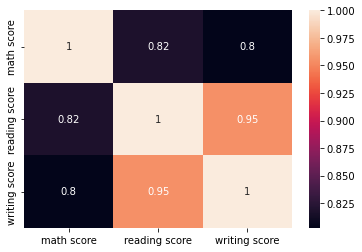

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

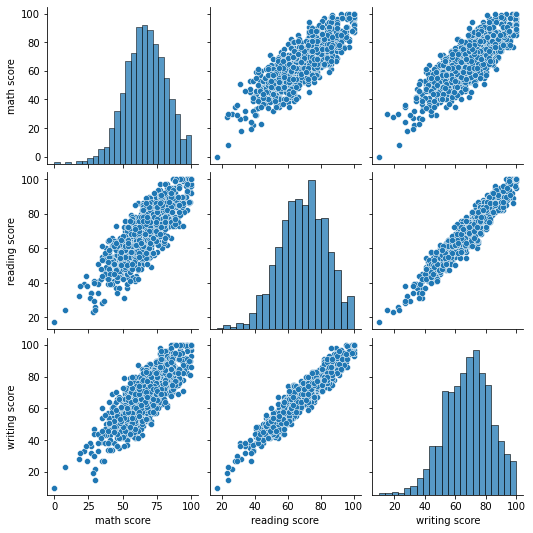

In [28]:
sns.pairplot(student)
# sued to view realtionship between any two variables : continous, categorical, boolean

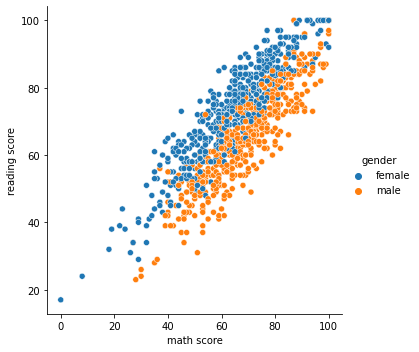

In [29]:
# use scatter plot to see relationship between two numerical variables
# use relation plot
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender', data = student)

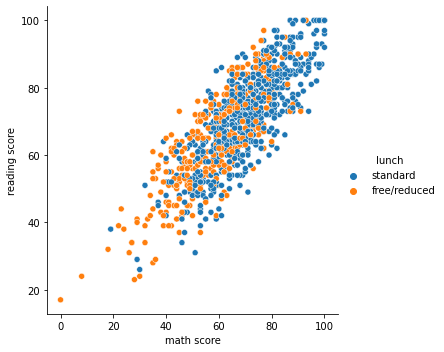

In [30]:
sns.relplot(x = 'math score', y = 'reading score', hue = 'lunch', data = student)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

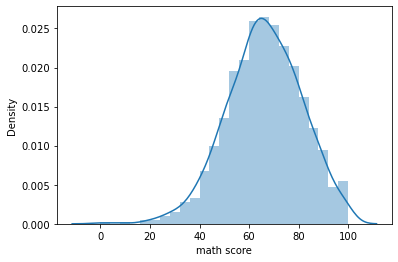

In [31]:
# using histograms
sns.distplot(student['math score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

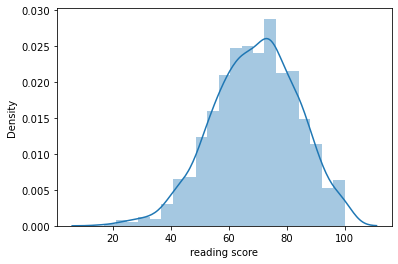

In [32]:
sns.distplot(student['reading score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

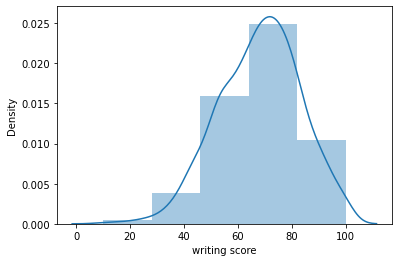

In [33]:
sns.distplot(student['writing score'], bins=5)

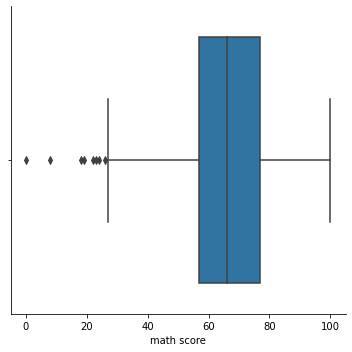

In [34]:
# categorical plot
sns.catplot(x = 'math score', kind= 'box', data = student)

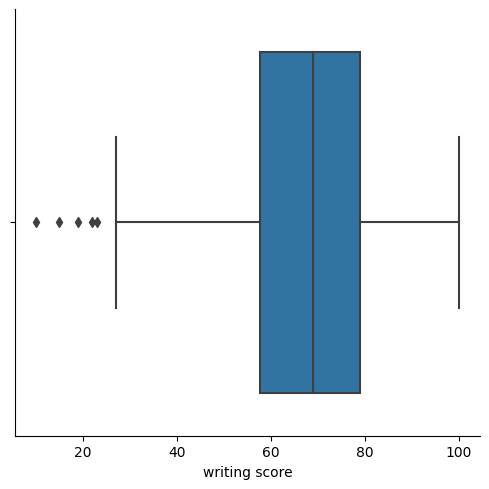

In [45]:
sns.catplot(x = 'writing score', kind= 'box', data = student)